# R12.
Doing this all over again but using some r12 data, that has NOT go through ASPCAP. Just going to see what happens.

These files were make in the notebook "2019-03-08"

In [12]:
%run binary_detection.py
%run binary_params.py

%run jitter.py
%run rv_from_param.py
%run chi_sq_mean.py
%run second_reduce.py
%run table_convert.py

%run synthetic_fractions.py
%run synthetic_galaxy.py
%run machine_error.py
%run error_with_jitter.py
%run binary_fraction.py
%run likelihood_no_mcmc.py

In [20]:
import pickle as rick
import numpy as np
import matplotlib.pyplot as plt
import astropy.units as u
from astropy.table import Table
from astropy.io import fits
import scipy.stats as sps

lmc12 = rick.load(open("/home/cody/Binary Search/r12-noaspcap-lmc-filtered.pck", 'rb'))
smc12 = rick.load(open("/home/cody/Binary Search/r12-noaspcap-smc-filtered.pck", 'rb'))

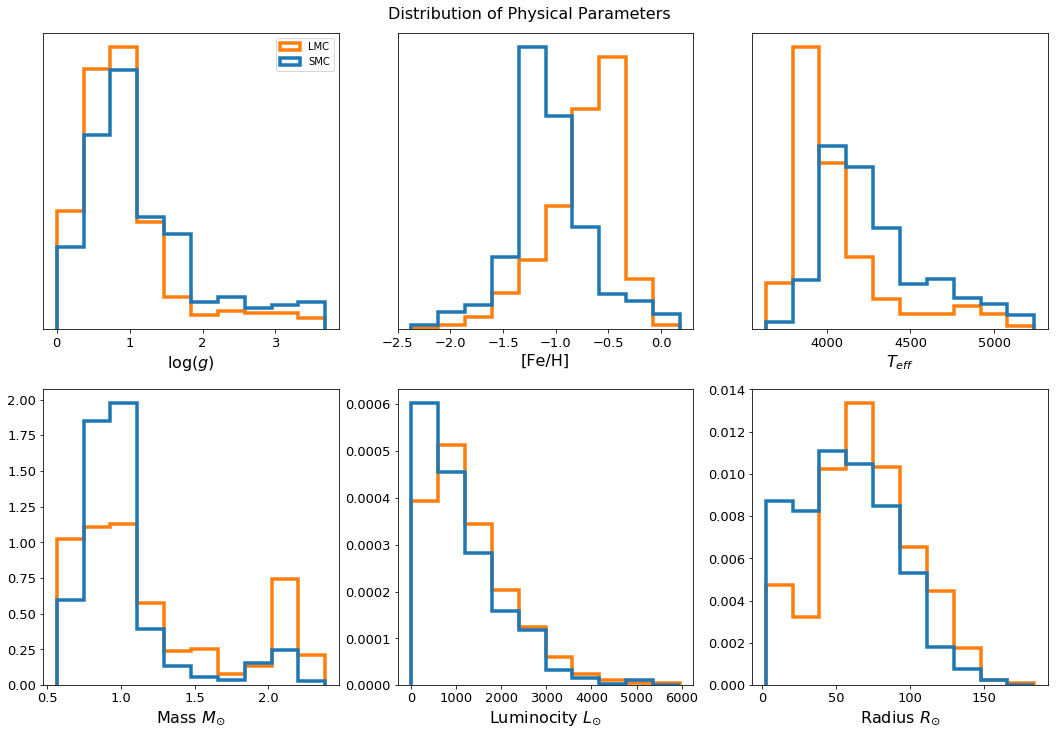

In [14]:
import matplotlib
fig, ax = plt.subplots(2, 3, figsize = (18,12))
matplotlib.rc('xtick', labelsize=13)
matplotlib.rc('ytick', labelsize=13)

ax[0][0].hist([smc12['LOGG'], lmc12['LOGG']],
           histtype='step',
           density= True,
           linewidth = 3.5,
           label = ["SMC", "LMC"])
ax[0][1].hist([smc12['FE_H'], lmc12['FE_H']],
           histtype='step',
           density= True,
           linewidth = 3.5)
ax[0][2].hist([smc12['TEFF'], lmc12['TEFF']],
           histtype='step',
           density= True,
           linewidth = 3.5)

ax[1][0].hist([smc12['ISO_MEANM'], lmc12['ISO_MEANM']],
           histtype='step',
           density= True,
           linewidth = 3.5,
           label = ["SMC", "LMC"])
ax[1][1].hist([smc12['ISO_MEANL'], lmc12['ISO_MEANL']],
           histtype='step',
           density= True,
           linewidth = 3.5)
ax[1][2].hist([smc12['ISO_MEANR'], lmc12['ISO_MEANR']],
           histtype='step',
           density= True,
           linewidth = 3.5)

ax[0][0].legend()

ax[0][0].set_xlabel("$\log(g)$", size = 16)
ax[0][1].set_xlabel("[Fe/H]", size = 16)
ax[0][2].set_xlabel("$T_{eff}$", size = 16)

ax[1][0].set_xlabel("Mass $M_{\odot}$", size = 16)
ax[1][1].set_xlabel("Luminocity $L_{\odot}$", size = 16)
ax[1][2].set_xlabel("Radius $R_{\odot}$", size = 16)

ax[0][0].set_yticks([])
ax[0][1].set_yticks([])
ax[0][2].set_yticks([])


fig.suptitle("Distribution of Physical Parameters", size = 16, y = 0.91)
# fig.savefig('properties-hist.pdf')
plt.show()

In [16]:
fraction_lmc = synthetic_fractions(250,
                                   lmc12,
                                   0.15,
                                   100*u.jupiterMass,
                                   3,
                                   2.4,
                                   0.6,
                                   0.6)

In [17]:
fraction_smc = synthetic_fractions(250,
                                   smc12,
                                   0.3,
                                   100*u.jupiterMass,
                                   3,
                                   2.4,
                                   0.6,
                                   0.6)

In [18]:
# Adds the extra jitter to the errors
a, b = 0.6, 0.6
lmc_err_j = error_with_jitter(lmc12['RADIAL_ERR'], a, b, lmc12['LOGG'])
lmc_detection = binary_fraction(lmc12['RADIALV'], lmc_err_j)
smc_err_j = error_with_jitter(smc12['RADIAL_ERR'], a, b, smc12['LOGG'])
smc_detection = binary_fraction(smc12['RADIALV'], smc_err_j)

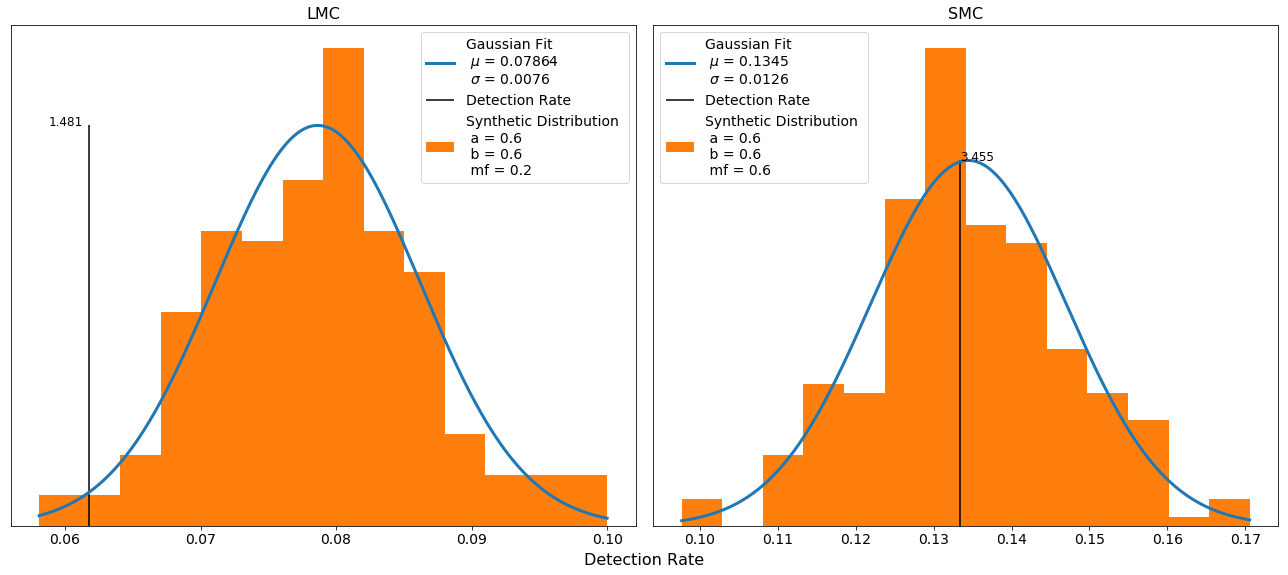

In [21]:
fig, ax = plt.subplots(1,2, figsize = (18,8))
fig.text(0.5, 0.02, 'Detection Rate', ha='center', va='center', size = 16)

lmc_mean = np.mean(fraction_lmc)
lmc_std = np.std(fraction_lmc)
lmc_skew = sps.skew(fraction_lmc)

lnl_LMC = -1/2*((lmc_detection - lmc_mean)**2 / lmc_std**2 + np.log(2*np.pi * lmc_std**2))

xl = np.linspace(min(fraction_lmc), max(fraction_lmc), 500)

smc_mean = np.mean(fraction_smc)
smc_std = np.std(fraction_smc)
smc_skew = sps.skew(fraction_smc)

lnl_SMC = -1/2*((smc_detection - smc_mean)**2 / smc_std**2 + np.log(2*np.pi * smc_std**2))

xs = np.linspace(min(fraction_smc), max(fraction_smc), 500)

ax[0].plot(xl, sps.norm.pdf(xl, lmc_mean, lmc_std), linewidth = 3)
ax[0].hist(fraction_lmc, bins = 'auto', density = True)
ax[0].vlines(lmc_detection, 0, max(sps.norm.pdf(xl, lmc_mean, lmc_std)))
ax[0].set_yticks([])
ax[0].set_title("LMC", size = 16)
ax[0].legend(['Gaussian Fit \n $\mu$ = {0:.{1}} \n $\sigma$ = {2:.{3}f}'.format(lmc_mean, 4, lmc_std, 4),
             "Detection Rate",
             "Synthetic Distribution \n a = 0.6 \n b = 0.6 \n mf = 0.2"],
             prop = {"size":14}) 
ax[0].text(lmc_detection-.003,
           max(sps.norm.pdf(xl, lmc_mean, lmc_std))
           , "{0:.{1}f}".format(lnl_LMC,3), fontsize=12)

ax[1].plot(xs, sps.norm.pdf(xs, smc_mean, smc_std), linewidth = 3)
ax[1].hist(fraction_smc, bins = 'auto', density = True)
ax[1].vlines(smc_detection, 0, max(sps.norm.pdf(xs, smc_mean, smc_std)))
ax[1].set_yticks([])
ax[1].set_title("SMC", size = 16)
ax[1].legend(['Gaussian Fit \n $\mu$ = {0:.{1}} \n $\sigma$ = {2:.{3}f}'.format(smc_mean, 4, smc_std, 4),
             "Detection Rate",
             "Synthetic Distribution \n a = 0.6 \n b = 0.6 \n mf = 0.6"],
             prop = {"size":14}, loc = 2)
ax[1].text(smc_detection,
           max(sps.norm.pdf(xs, smc_mean, smc_std))
           , "{0:.{1}f}".format(lnl_SMC,3), fontsize=12)

ax[0].tick_params( labelsize=14)
ax[1].tick_params( labelsize=14)
fig.tight_layout()
fig.subplots_adjust(bottom=0.08)
# fig.savefig("synthetic-example.pdf")
plt.show()

In [22]:
import datetime as dt
def lnlh_lmc(a):
    b = 0.61
    gal = lmc12
    mu = 3.2
    sigma = 2.4


    fractions = np.linspace(0, 1, 50)


    gal_err_j = error_with_jitter(gal['RADIAL_ERR'], a, b, gal['LOGG'])

    detection_rate_j = binary_fraction(gal['RADIALV'], gal_err_j)
    lnl = []
    for n in range(len(fractions)):
        lnl.append(lnlikelihood(detection_rate_j,
                                250,
                                gal,
                                fractions[n],
                                150 * u.jupiterMass,
                                mu,
                                sigma,
                                a,
                                b)
                   )
        print("Done with,", n)
    return lnl

def lnlh_smc(a):
    b = 0.61
    gal = smc12
    mu = 3.2
    sigma = 2.4


    fractions = np.linspace(0, 1, 50)


    gal_err_j = error_with_jitter(gal['RADIAL_ERR'], a, b, gal['LOGG'])

    detection_rate_j = binary_fraction(gal['RADIALV'], gal_err_j)

    lnl = []
    for n in range(len(fractions)):
        lnl.append(lnlikelihood(detection_rate_j,
                                250,
                                gal,
                                fractions[n],
                                150 * u.jupiterMass,
                                mu,
                                sigma,
                                a,
                                b)
                   )
        print("Done with,", n)
    return lnl

In [23]:
from multiprocessing import Pool
aa = [0.8, 0.6, 0.4, 0.2, 0]
pool = Pool()
answer_lmc = pool.map(lnlh_lmc, aa)

Done with, 0
Done with, 0
Done with, 0
Done with, 0
Done with, 0
Done with, 1
Done with, 1
Done with, 1
Done with, 1
Done with, 1
Done with, 2
Done with, 2
Done with, 2
Done with, 2
Done with, 2
Done with, 3
Done with, 3
Done with, 3
Done with, 3
Done with, 3
Done with, 4
Done with, 4
Done with, 4
Done with, 4
Done with, 4
Done with, 5
Done with, 5
Done with, 5
Done with, 5
Done with, 5
Done with, 6
Done with, 6
Done with, 6
Done with, 6
Done with, 6
Done with, 7
Done with, 7
Done with, 7
Done with, 7
Done with, 7
Done with, 8
Done with, 8
Done with, 8
Done with, 8
Done with, 8
Done with, 9
Done with, 9
Done with, 9
Done with, 9
Done with, 9
Done with, 10
Done with, 10
Done with, 10
Done with, 10
Done with, 10
Done with, 11
Done with, 11
Done with, 11
Done with, 11
Done with, 11
Done with, 12
Done with, 12
Done with, 12
Done with, 12
Done with, 12
Done with, 13
Done with, 13
Done with, 13
Done with, 13
Done with, 13
Done with, 14
Done with, 14
Done with, 14
Done with, 14
Done with, 14


In [24]:
pool = Pool()
answer_smc = pool.map(lnlh_smc, aa)

Done with, 0
Done with, 0
Done with, 0
Done with, 0
Done with, 0
Done with, 1
Done with, 1
Done with, 1
Done with, 1
Done with, 2
Done with, 2
Done with, 1
Done with, 2
Done with, 2
Done with, 3
Done with, 3
Done with, 2
Done with, 3
Done with, 4
Done with, 3
Done with, 3
Done with, 4
Done with, 4
Done with, 4
Done with, 4
Done with, 5
Done with, 5
Done with, 5
Done with, 5
Done with, 5
Done with, 6
Done with, 6
Done with, 6
Done with, 6
Done with, 7
Done with, 7
Done with, 6
Done with, 7
Done with, 8
Done with, 7
Done with, 8
Done with, 8
Done with, 9
Done with, 7
Done with, 9
Done with, 8
Done with, 10
Done with, 9
Done with, 8
Done with, 10
Done with, 11
Done with, 9
Done with, 9
Done with, 11
Done with, 10
Done with, 10
Done with, 12
Done with, 12
Done with, 11
Done with, 10
Done with, 13
Done with, 11
Done with, 13
Done with, 11
Done with, 14
Done with, 14
Done with, 12
Done with, 12
Done with, 12
Done with, 15
Done with, 15
Done with, 13
Done with, 16
Done with, 13
Done with, 13


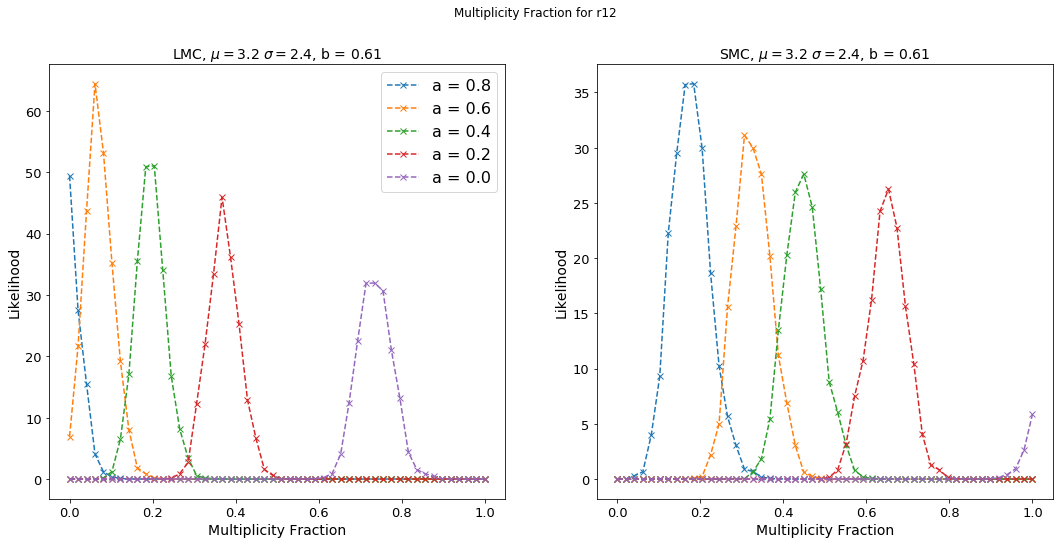

In [25]:
fig, ax = plt.subplots(1, 2, figsize = (18,8))
matplotlib.rc('xtick', labelsize=13)
matplotlib.rc('ytick', labelsize=13)
fig.suptitle("Multiplicity Fraction for r12")
ax[0].plot(np.linspace(0,1,50),np.exp(answer_lmc[0]), 'x--', label = 'a = 0.8')
ax[0].plot(np.linspace(0,1,50),np.exp(answer_lmc[1]), 'x--', label = 'a = 0.6')
ax[0].plot(np.linspace(0,1,50),np.exp(answer_lmc[2]), 'x--', label = 'a = 0.4')
ax[0].plot(np.linspace(0,1,50),np.exp(answer_lmc[3]), 'x--', label = 'a = 0.2')
ax[0].plot(np.linspace(0,1,50),np.exp(answer_lmc[4]), 'x--', label = 'a = 0.0')

ax[1].plot(np.linspace(0,1,50),np.exp(answer_smc[0]), 'x--', label = 'a = 0.8')
ax[1].plot(np.linspace(0,1,50),np.exp(answer_smc[1]), 'x--', label = 'a = 0.6')
ax[1].plot(np.linspace(0,1,50),np.exp(answer_smc[2]), 'x--', label = 'a = 0.4')
ax[1].plot(np.linspace(0,1,50),np.exp(answer_smc[3]), 'x--', label = 'a = 0.2')
ax[1].plot(np.linspace(0,1,50),np.exp(answer_smc[4]), 'x--', label = 'a = 0.0')

ax[0].legend(prop = {'size': 16})
ax[0].set_title('LMC, $\mu = 3.2$ $\sigma = 2.4$, b = 0.61', size = 14)
ax[0].set_xlabel("Multiplicity Fraction", size = 14)
ax[0].set_ylabel("Likelihood", size = 14)

ax[1].set_title('SMC, $\mu = 3.2$ $\sigma = 2.4$, b = 0.61', size = 14)
ax[1].set_xlabel("Multiplicity Fraction", size = 14)
ax[1].set_ylabel("Likelihood", size = 14)
fig.savefig('r12-binary-fraction.pdf')
plt.show()

In [27]:
def same_dat(table1, table2,  temp_lim = 250, logg_lim = 0.2, feh_lim = 0.2, snr_lim = 100):
    """
    Makes the data between two tables similar with in some limit
    
    Inputs
    ---------
    table1:  Should be the larger table that we want cut down
    table2:  Should be the smaller table that we want to compare the larger table to
    limit:   Tollerence that we want to compare the data to.
    
    Output
    ----------
    table1:  Modified table1 only keeping data points that are close to table2
    """
    # For each row in all_average_data, find isochrone rows that have similar
    # values, and make a list of all of those entries.
    dtype_list = []
    table1_foo = Table(table1, copy = True)
    table2_foo = Table(table2, copy = True)
    for n in range(len(table1_foo.dtype)):
        dtype_list.append(table1_foo.dtype[n])
    
    table3_foo = Table(names = table1_foo.colnames, dtype = dtype_list)
    rr = []
    for j in range(len(table2)):
        gd, = np.where((np.abs(table1_foo['TEFF'] - table2_foo['TEFF'][j]) < temp_lim) &
                       (np.abs(table1_foo['LOGG'] - table2_foo['LOGG'][j]) < logg_lim) &
                       (np.abs(table1_foo['FE_H'] - table2_foo['FE_H'][j]) < feh_lim ) #&
                       #(np.abs(table1_foo['VERR'] - table2['VERR'][j]) < snr_lim )
                      )
                       
        #print(gd, type(gd))
        if len(gd) == 1:
            table3_foo.add_row(table1_foo[gd[0]])
            table1_foo.remove_row(gd[0])
            #print(len(table1_foo))
        elif len(gd) > 2:
            rand = np.random.randint(0,len(gd))
            table3_foo.add_row(table1_foo[gd[rand]])
            table1_foo.remove_row(gd[rand])
        else:
            rr.append(j)
    
    table2_foo.remove_rows(rr)

    return table3_foo, table2_foo

In [28]:
lmc12_same_f, smc12_same_f = same_dat(lmc12, smc12, temp_lim = 500, logg_lim = 0.5, feh_lim = 0.02,)
print(len(lmc12_same_f), len(smc12_same_f))

415 415


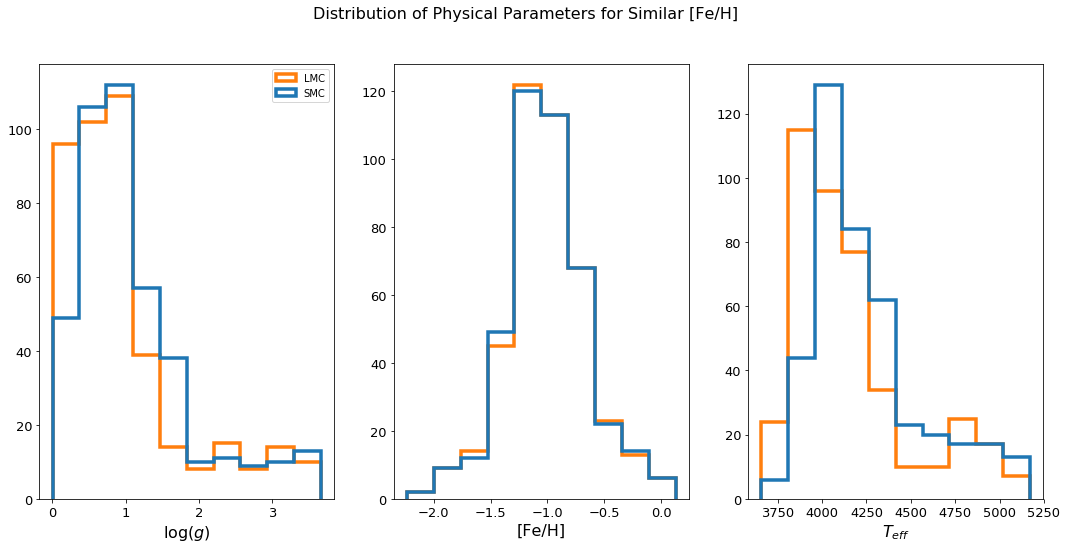

In [29]:
fig, ax = plt.subplots(1, 3, figsize = (18,8))
matplotlib.rc('xtick', labelsize=13)
matplotlib.rc('ytick', labelsize=13)
ax[0].hist([smc12_same_f['LOGG'], lmc12_same_f['LOGG']],
           histtype='step',
           density= False,
           linewidth = 3.5,
           label = ["SMC", "LMC"])
ax[1].hist([smc12_same_f['FE_H'], lmc12_same_f['FE_H']],
           histtype='step',
           density= False,
           linewidth = 3.5)
ax[2].hist([smc12_same_f['TEFF'], lmc12_same_f['TEFF']],
           histtype='step',
           density= False,
           linewidth = 3.5)

ax[0].legend()

ax[0].set_xlabel("$\log(g)$", size = 16)
ax[1].set_xlabel("[Fe/H]", size = 16)
ax[2].set_xlabel("$T_{eff}$", size = 16)

# ax[0].set_yticks([])
# ax[1].set_yticks([])
# ax[2].set_yticks([])

fig.suptitle("Distribution of Physical Parameters for Similar [Fe/H]", size = 16)
fig.savefig("feh-hist-prop.pdf")
plt.show()

In [30]:
import datetime as dt
def lnlh_lmc12_sf(a):
    b = 0.61
    gal = lmc12_same_f
    mu = 3.2
    sigma = 2.4


    fractions = np.linspace(0, 1, 50)


    gal_err_j = error_with_jitter(gal['RADIAL_ERR'], a, b, gal['LOGG'])

    detection_rate_j = binary_fraction(gal['RADIALV'], gal_err_j)
    lnl = []
    for n in range(len(fractions)):
        lnl.append(lnlikelihood(detection_rate_j,
                                250,
                                gal,
                                fractions[n],
                                150 * u.jupiterMass,
                                mu,
                                sigma,
                                a,
                                b)
                   )
        print("Done with,", n)
    return lnl

def lnlh_smc12_sf(a):
    b = 0.61
    gal = smc12_same_f
    mu = 3.2
    sigma = 2.4


    fractions = np.linspace(0, 1, 50)


    gal_err_j = error_with_jitter(gal['RADIAL_ERR'], a, b, gal['LOGG'])

    detection_rate_j = binary_fraction(gal['RADIALV'], gal_err_j)

    lnl = []
    for n in range(len(fractions)):
        lnl.append(lnlikelihood(detection_rate_j,
                                250,
                                gal,
                                fractions[n],
                                150 * u.jupiterMass,
                                mu,
                                sigma,
                                a,
                                b)
                   )
        print("Done with,", n)
    return lnl

In [31]:
pool = Pool()
answer_lmc12_sf = pool.map(lnlh_lmc12_sf, aa)

Done with, 0
Done with, 0
Done with, 0
Done with, 0
Done with, 0
Done with, 1
Done with, 1
Done with, 1
Done with, 1
Done with, 1
Done with, 2
Done with, 2
Done with, 2
Done with, 2
Done with, 2
Done with, 3
Done with, 3
Done with, 3
Done with, 3
Done with, 3
Done with, 4
Done with, 4
Done with, 4
Done with, 4
Done with, 4
Done with, 5
Done with, 5
Done with, 5
Done with, 5
Done with, 5
Done with, 6
Done with, 6
Done with, 6
Done with, 6
Done with, 7
Done with, 7
Done with, 6
Done with, 7
Done with, 7
Done with, 8
Done with, 7
Done with, 8
Done with, 8
Done with, 8
Done with, 8
Done with, 9
Done with, 9
Done with, 9
Done with, 9
Done with, 9
Done with, 10
Done with, 10
Done with, 10
Done with, 10
Done with, 11
Done with, 11
Done with, 10
Done with, 11
Done with, 11
Done with, 12
Done with, 12
Done with, 12
Done with, 11
Done with, 12
Done with, 13
Done with, 13
Done with, 13
Done with, 13
Done with, 12
Done with, 14
Done with, 14
Done with, 14
Done with, 14
Done with, 13
Done with, 15


In [32]:
pool = Pool()
answer_smc12_sf = pool.map(lnlh_smc12_sf, aa)

Done with, 0
Done with, 0
Done with, 0
Done with, 0
Done with, 0
Done with, 1
Done with, 1
Done with, 1
Done with, 1
Done with, 1
Done with, 2
Done with, 2
Done with, 2
Done with, 2
Done with, 2
Done with, 3
Done with, 3
Done with, 3
Done with, 3
Done with, 3
Done with, 4
Done with, 4
Done with, 4
Done with, 4
Done with, 4
Done with, 5
Done with, 5
Done with, 5
Done with, 5
Done with, 5
Done with, 6
Done with, 6
Done with, 6
Done with, 6
Done with, 6
Done with, 7
Done with, 7
Done with, 7
Done with, 7
Done with, 7
Done with, 8
Done with, 8
Done with, 8
Done with, 8
Done with, 8
Done with, 9
Done with, 9
Done with, 9
Done with, 9
Done with, 9
Done with, 10
Done with, 10
Done with, 10
Done with, 10
Done with, 10
Done with, 11
Done with, 11
Done with, 11
Done with, 11
Done with, 11
Done with, 12
Done with, 12
Done with, 12
Done with, 12
Done with, 12
Done with, 13
Done with, 13
Done with, 13
Done with, 13
Done with, 13
Done with, 14
Done with, 14
Done with, 14
Done with, 14
Done with, 14


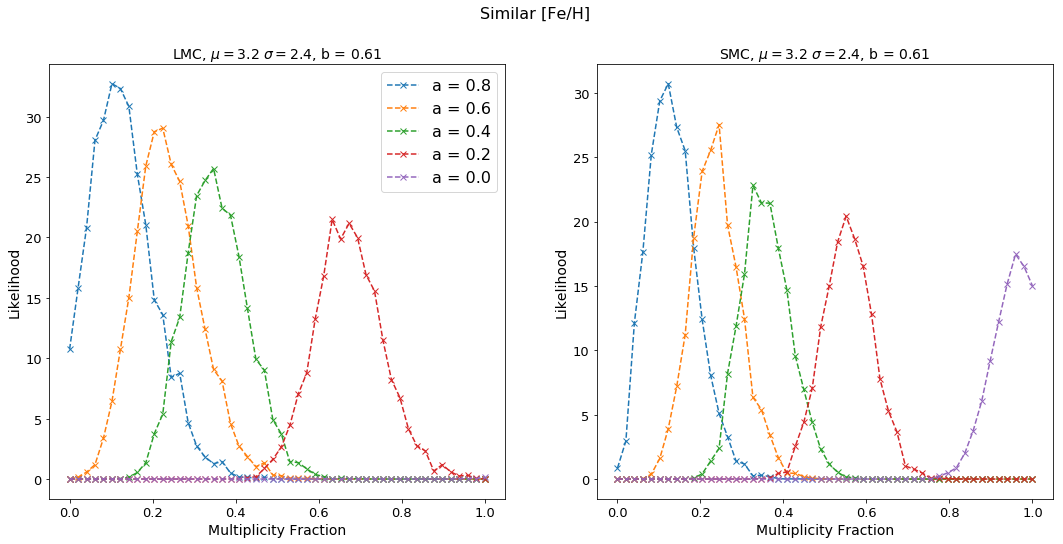

In [33]:
fig, ax = plt.subplots(1, 2, figsize = (18,8))
matplotlib.rc('xtick', labelsize=13)
matplotlib.rc('ytick', labelsize=13)
ax[0].plot(np.linspace(0,1,50),np.exp(answer_lmc12_sf[0]), 'x--', label = 'a = 0.8')
ax[0].plot(np.linspace(0,1,50),np.exp(answer_lmc12_sf[1]), 'x--', label = 'a = 0.6')
ax[0].plot(np.linspace(0,1,50),np.exp(answer_lmc12_sf[2]), 'x--', label = 'a = 0.4')
ax[0].plot(np.linspace(0,1,50),np.exp(answer_lmc12_sf[3]), 'x--', label = 'a = 0.2')
ax[0].plot(np.linspace(0,1,50),np.exp(answer_lmc12_sf[4]), 'x--', label = 'a = 0.0')

ax[1].plot(np.linspace(0,1,50),np.exp(answer_smc12_sf[0]), 'x--', label = 'a = 0.8')
ax[1].plot(np.linspace(0,1,50),np.exp(answer_smc12_sf[1]), 'x--', label = 'a = 0.6')
ax[1].plot(np.linspace(0,1,50),np.exp(answer_smc12_sf[2]), 'x--', label = 'a = 0.4')
ax[1].plot(np.linspace(0,1,50),np.exp(answer_smc12_sf[3]), 'x--', label = 'a = 0.2')
ax[1].plot(np.linspace(0,1,50),np.exp(answer_smc12_sf[4]), 'x--', label = 'a = 0.0')

ax[0].legend(prop = {'size': 16})
ax[0].set_title('LMC, $\mu = 3.2$ $\sigma = 2.4$, b = 0.61', size = 14)
ax[0].set_xlabel("Multiplicity Fraction",size = 14)
ax[0].set_ylabel("Likelihood", size = 14)

ax[1].set_title('SMC, $\mu = 3.2$ $\sigma = 2.4$, b = 0.61',size = 14)
ax[1].set_xlabel("Multiplicity Fraction", size = 14)
ax[1].set_ylabel("Likelihood", size = 14)

fig.suptitle("Similar [Fe/H]", size = 16)
fig.savefig("likelihood-similar-iron-r12.pdf")
plt.show()

In [34]:
f = "r12-likelihoods-2019-04-11.pck"

with open(f, "wb") as f:
    pickle.dump([answer_lmc, answer_smc, answer_lmc12_sf, answer_smc12_sf], f)

In [37]:
a,b,c,d = rick.load(open("/home/cody/Binary Search/bayesian likelihood/r12-likelihoods-2019-04-11.pck", 'rb'))

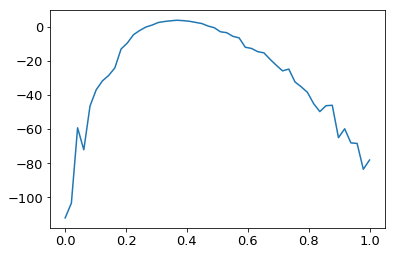